# Boolean Indexing & Masking

## Learning Objectives

* The concept of boolean masks
* Dropping/Masking data using `where`
* Using `isin` for creating a boolean mask

## Overview

*Boolean masking*, known as *boolean indexing*, is a functionality in Python that enables the filtering of values based on a specific condition.

A boolean mask refers to a binary array or a boolean-valued array that is used as a *filter* to select specific elements from another array. The boolean mask acts as a criterion or condition, where each element in the mask corresponds to an element in the target array. The mask determines whether the corresponding element in the target array should be selected or not. 

Xarray provides different capabilities to allow filtering and boolean indexing. In this notebook, we will learn more about it.

First, let's import the packages needed for this notebook: 

In [7]:
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
from matplotlib import pyplot as plt

In this tutorial, we’ll use the Regional Arctic System Mode (RASM) dataset from the `xarray-data` repository.

In [9]:
ds = xr.tutorial.load_dataset("rasm")
ds

<xarray.Dataset>
Dimensions:  (time: 36, y: 205, x: 275)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: y, x
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan ... 29.8 28.66 28.19 28.21
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...
    history:                   Fri Aug  7 17:57:38 2020: ncatted -a bounds,,d...

In this dataset, the logical coordinates are `x` and `y`, while the physical coordinates are `xc` and `yc`, which represent the latitudes and longitude of the data.

In [10]:
print(ds.xc.attrs)
print(ds.yc.attrs)

{'long_name': 'longitude of grid cell center', 'units': 'degrees_east'}
{'long_name': 'latitude of grid cell center', 'units': 'degrees_north'}


In [11]:
da = ds.Tair
da

<xarray.DataArray 'Tair' (time: 36, y: 205, x: 275)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., 27.03290153,
         27.03125761, 27.33531541],
        [        nan,         nan,         nan, ..., 27.2784053 ,
         26.80261869, 27.08603517],
        [        nan,         nan,         nan, ..., 27.02344402,
         26.56473862, 26.73064933]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ..., 27.8597472 ,
         27.82928439, 28.09249224],
        [        nan,         nan,         nan, ..., 27.89704094,
         27.31104941, 27.67387171],
        [        nan,         nan,         nan, ..., 27.46837113,
         27.0088944 , 27.23017976]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., 28.95929072,
         28.87672039, 29.04890862],
        [        nan,         nan,         nan, ..., 29.036132  ,
         28.42273578, 28.68721201],
        [        nan,         nan,         nan, ..., 28.66381585,
         28.18595533, 28.20753022]]])
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: y, x
Attributes:
    units:           C
    long_name:       Surface air temperature
    type_preferred:  double
    time_rep:        instantaneous

## Masking with `where()`

Indexing methods on Xarray objects generally return a subset of the original data. However, it is sometimes useful to select an object with the same shape as the original data, but with some elements masked. 

By applying `.where()`, the original data's shape is maintained, with values masked based on a Boolean condition. Values that satisfy the condition (`True`) are returned unchanged, while values that do not meet the condition (`False`) are replaced with a predefined value.

In the example below, we replace all `nan` values with `-9999`:

In [12]:
# Let's replace the missing values (nan) with some placeholder
ds.Tair.where(ds.Tair.notnull(), -9999)

<xarray.DataArray 'Tair' (time: 36, y: 205, x: 275)>
array([[[-9999.        , -9999.        , -9999.        , ...,
         -9999.        , -9999.        , -9999.        ],
        [-9999.        , -9999.        , -9999.        , ...,
         -9999.        , -9999.        , -9999.        ],
        [-9999.        , -9999.        , -9999.        , ...,
         -9999.        , -9999.        , -9999.        ],
        ...,
        [-9999.        , -9999.        , -9999.        , ...,
            27.03290153,    27.03125761,    27.33531541],
        [-9999.        , -9999.        , -9999.        , ...,
            27.2784053 ,    26.80261869,    27.08603517],
        [-9999.        , -9999.        , -9999.        , ...,
            27.02344402,    26.56473862,    26.73064933]],

       [[-9999.        , -9999.        , -9999.        , ...,
         -9999.        , -9999.        , -9999.        ],
        [-9999.        , -9999.        , -9999.        , ...,
         -9999.        , -9999.        , -9999.        ],
        [-9999.        , -9999.        , -9999.        , ...,
         -9999.        , -9999.        , -9999.        ],
...
        [-9999.        , -9999.        , -9999.        , ...,
            27.8597472 ,    27.82928439,    28.09249224],
        [-9999.        , -9999.        , -9999.        , ...,
            27.89704094,    27.31104941,    27.67387171],
        [-9999.        , -9999.        , -9999.        , ...,
            27.46837113,    27.0088944 ,    27.23017976]],

       [[-9999.        , -9999.        , -9999.        , ...,
         -9999.        , -9999.        , -9999.        ],
        [-9999.        , -9999.        , -9999.        , ...,
         -9999.        , -9999.        , -9999.        ],
        [-9999.        , -9999.        , -9999.        , ...,
         -9999.        , -9999.        , -9999.        ],
        ...,
        [-9999.        , -9999.        , -9999.        , ...,
            28.95929072,    28.87672039,    29.04890862],
        [-9999.        , -9999.        , -9999.        , ...,
            29.036132  ,    28.42273578,    28.68721201],
        [-9999.        , -9999.        , -9999.        , ...,
            28.66381585,    28.18595533,    28.20753022]]])
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: y, x
Attributes:
    units:           C
    long_name:       Surface air temperature
    type_preferred:  double
    time_rep:        instantaneous

As you can see, in the example above `.where()` preserved the **shape** of the original data by masking the values with a boolean condition. 

Most uses of `.where()` check whether or not specific data values are less than or greater than a constant value. 

The data values specified in the boolean condition of `.where()` can be any of the following:

* a `DataArray`
* a `Dataset`
* a function

In the following example, we make use of `.where()` to mask all temperature below 0°C.



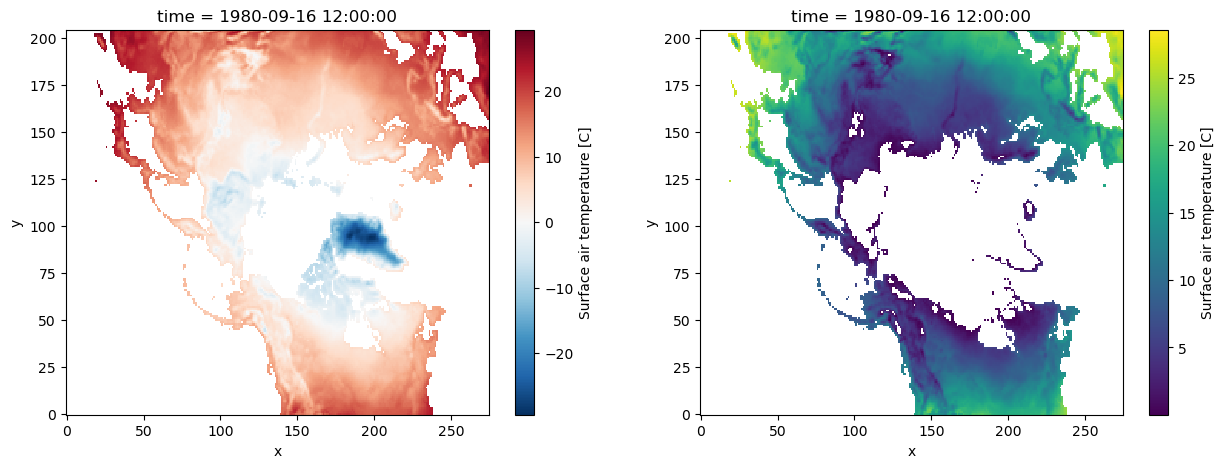

In [17]:
da_masked = da.where(da >= 0)

# -- making both plots for comparison:
fig, axes = plt.subplots(ncols=2, figsize=(15,5))

# -- for reference (without masking):
da[0, :, :].plot(ax=axes[0]);

# -- masked DataArray
da_masked[0, :, :].plot(ax=axes[1]);

```tip
By default Xarray set the masked values to `nan`. But as we saw in the first example, we can set it to other values too. 
```

```{exercise}
:label: boolean-2

Using the syntax you’ve learned so far, mask all the points with latitudes above 60° N.
```


In [ ]:
# write your answer here!

````{solution} boolean-2
:class: dropdown
```python
da_masked = da.where(da.yc >= 60)
da_masked[0, :, :].plot();
```
````

As mentioned above, by default `where` maintains the original size of the data. You can use  the option `drop=True` to clip coordinate elements that are fully masked:

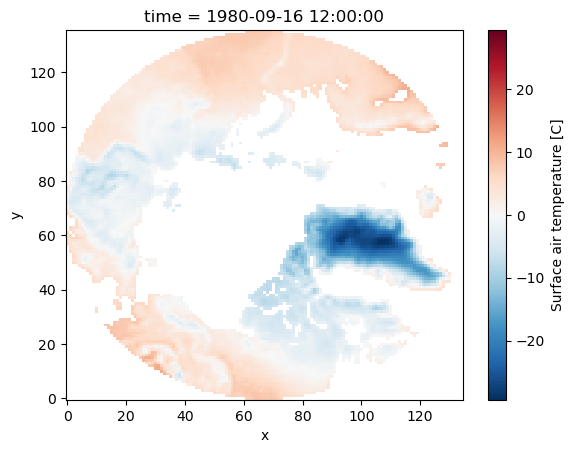

In [18]:
da_masked = da.where(da.yc > 60, drop=True)
da_masked[0, :, :].plot();

Please note that in this dataset, the variables `xc` (longitude) and `yc` (latitude) are two-dimensional scalar fields.

When we plotted the data variable `Tair`, by default we get the logical coordinates (i.e. `x` and `y`) as we show in the example above. 

In order to visualize the data on a conventional latitude-longitude grid, we can take advantage of Xarray’s ability to apply `cartopy` map projections.

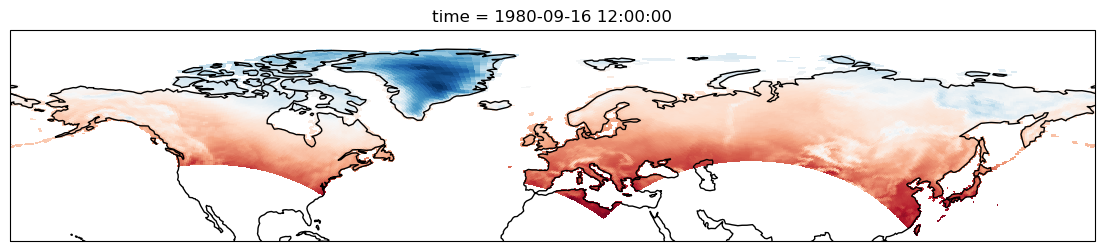

In [19]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds.Tair[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="xc", y="yc", add_colorbar=False
)
ax.coastlines()
ax.set_ylim([20, 90]);

### Using `where` with Multiple Conditions


In Xarray's `.where()` function, boolean conditions can be combined using logical operators. The bitwise `and` operator (`&`) and the bitwise `or` operator (`|`) are relevant in this case. This allows for specifying multiple masking conditions within a single `.where()` statement.

We can select data for one specific region using bound boxes. For example, here we want to access data over a region over Alaska :

In [20]:
# -- define a region
min_lon = 190
min_lat = 55
max_lon = 230
max_lat = 85

First we have to create our boolean masks:

In [21]:
mask_lon = (ds.xc >= min_lon) & (ds.xc <= max_lon)
mask_lat = (ds.yc >= min_lat) & (ds.yc <= max_lat)


Next, we can use the boolean masks for filtering data for that region: 

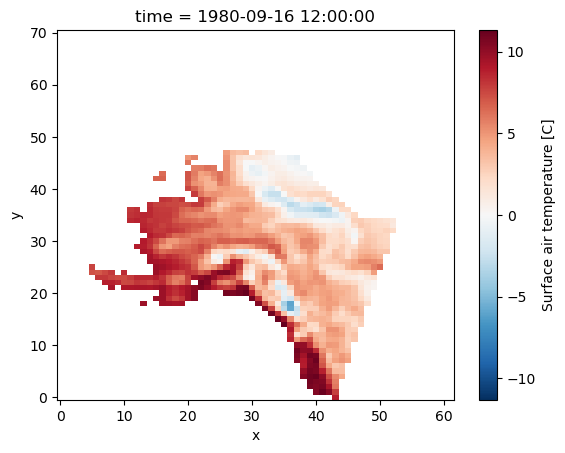

In [22]:
da_masked = da.where(mask_lon & mask_lat, drop=True)

da_masked[0, :, :].plot();

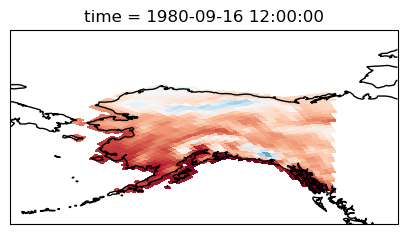

In [23]:
plt.figure(figsize=(5, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
da_masked[0, :, :].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="xc", y="yc", add_colorbar=False
)
ax.coastlines();
ax.set_ylim([50, 80]);
ax.set_xlim([-180, -120]);

### Excercise

If we load air temperature dataset from NCEP, we could use `sel` method for selecting a region:


````{exercise}
:label: boolean-1

If we load air temperature dataset from NCEP, we could use `sel` method for selecting a region:

```python
ds = xr.tutorial.open_dataset("air_temperature")
ds_region = ds.sel(lat=slice(75,50), lon=slice(250,300))

ds_region.air[0].plot();
```
Can you use a similar method as above using `sel` to crop a region using the RASM dataset? Why?

````

````{solution} indexing-1
:class: dropdown
This method will not work here as the dimensions are different from coordinates here.  Specifically, the variables xc (longitude) and yc (latitude) are two-dimensional scalar fields, which differ from the logical coordinates represented by x and y.

So the code below will not give the correct answer!
```python
cropped_ds = ds.sel(x=slice(min_lat,max_lat), y=slice(min_lon,max_lon))
cropped_ds.Tair[0].plot()
```
````


### Using `xr.where` with a Function

We can use `xr.where` with a function as a condition too. For example, here we want to convert temperature to Kelvin and find if temperature is greater than 300 K. 

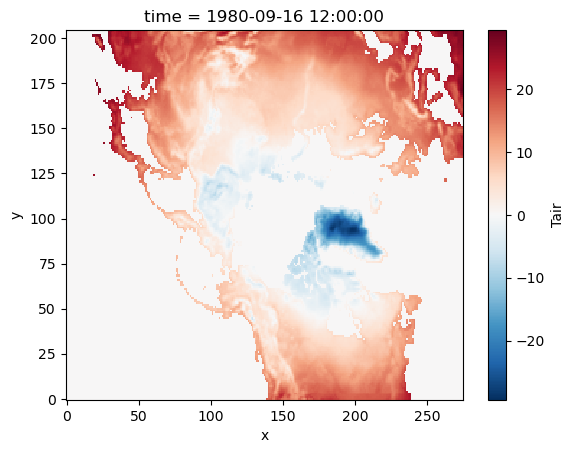

In [27]:
# Define a function to use as a condition
def is_greater_than_threshold(x, threshhold=300):
    # function to convert temp to K
    # and compare with threshhold
    x= x+273.15 
    return x > threshhold

# Apply the condition using xarray.where()
masked_data = xr.where(is_greater_than_threshold(da,50), da, 0)

masked_data[0].plot()

## Selecting Values with `isin`

To check whether elements of an xarray object contain a single object, you can compare with the equality operator `==` (e.g., `arr == 3`). 

To check multiple values, we use `isin()`:

Here is a simple example: 

In [ ]:
x_da = xr.DataArray([1, 2, 3, 4, 5], dims=["x"])

# -- select points with values equal to 2 and 4:
x_da.isin([2, 4])

```tip
`isin()` works particularly well with `where()` to support indexing by arrays that are not already labels of an array. 
```

For example, we have another `DataArray` that displays the status flags of the data-collecting device for our data. 

Here, flags with value 0 and -1 signifies the device was functioning correctly, while 0 indicates a malfunction, implying that the resulting data collected may not be accurate.

In [ ]:
flags = xr.DataArray(np.random.randint(-1, 5, da.shape), dims=da.dims, coords=da.coords)
flags

Now, we want to only see the data for points where out measurement device is working correctly: 

In [ ]:
da_masked = da.where(flags.isin([1, 2, 3, 4, 5]), drop=True)
da_masked[0, :, :].plot();

```warning
Please note that when done repeatedly, this type of indexing is significantly slower than using `sel()`.
```

## Additional Resources

- [Xarray Docs - Indexing and Selecting Data](https://docs.xarray.dev/en/stable/indexing.html)
